# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.com)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Part II: Portfolio Optimization with Risk Factors using Stepwise Regression

## 1. Downloading the data:

In [31]:
import numpy as np
import pandas as pd
import yfinance as yf

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%***********************]  29 of 29 completed


In [32]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6780%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1376%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1480%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios

### 2.1 Estimating the loadings matrix.

This part is just to visualize how Riskfolio-Lib calculates a loadings matrix.

In [33]:
import riskfolio.ParamsEstimation as pe

step = 'Forward' # Could be Forward or Backward stepwise regression
loadings = pe.loadings_matrix(X=X, Y=Y, stepwise=step)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6566,0.0000,0.9380,-0.7882,1.7278
BAX,0.0003,0.3146,0.0000,0.0000,0.7717,0.0000
BMY,-0.0003,0.0000,0.8123,0.0000,0.0000,0.0000
CMCSA,0.0001,0.0000,0.4958,0.0000,0.4962,0.0000
CNP,0.0001,-0.5595,-0.2157,0.0000,1.8341,0.0000
CPB,-0.0003,-0.4788,-0.5992,0.0000,2.0808,0.0000
DE,0.0004,0.0000,0.0000,0.3633,0.0000,0.8093
DHR,0.0007,0.4817,0.0000,0.0000,0.8180,-0.2158
HPQ,0.0002,0.0000,0.0000,0.0000,0.0000,1.2514
JCI,0.0001,0.0000,0.0000,0.3354,0.0000,0.5854


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [38]:
port.assets_stats?

In [36]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

port.factors = X
port.factors_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,10.7366%,0.0000%,0.0000%,8.8164%,0.0000%,4.4015%,11.9282%,0.0000%,0.0000%,...,14.9636%,0.0000%,8.9182%,0.0000%,0.0000%,0.0000%,5.4728%,0.0000%,3.3483%,0.0000%


### 2.3 Plotting portfolio composition

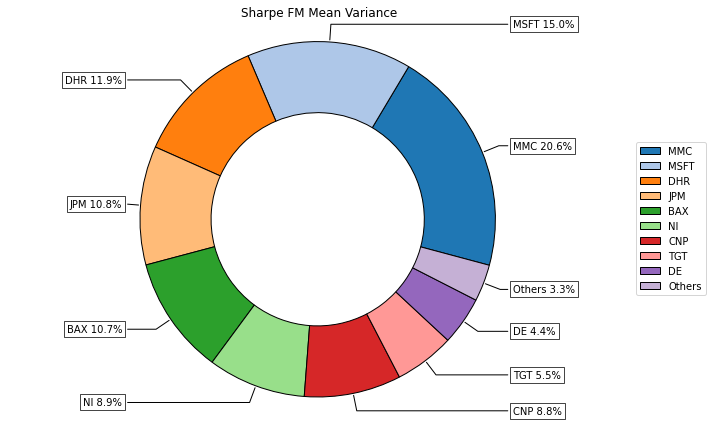

In [11]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [12]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,2.1991%,4.5591%,3.8256%,9.2597%,5.3360%,0.0000%,0.7115%,0.0000%,4.7328%,...,0.0000%,0.0000%,12.8295%,0.0000%,13.7885%,1.3273%,4.3013%,0.0000%,11.3439%,2.2330%
1,0.0000%,7.1031%,0.0259%,3.1105%,11.3751%,2.6165%,1.1440%,4.7942%,0.0000%,2.1134%,...,1.5983%,0.0000%,14.3571%,0.0000%,5.7155%,0.0000%,5.2877%,0.0000%,11.1573%,2.0792%
2,0.0000%,8.3819%,0.0000%,2.1778%,11.9097%,1.2467%,1.9380%,6.3285%,0.0000%,0.4634%,...,4.4822%,0.0000%,14.6208%,0.0000%,1.6405%,0.0000%,5.5047%,0.0000%,10.6892%,1.5642%
3,0.0000%,9.3622%,0.0000%,0.6565%,11.5806%,0.0000%,2.7450%,7.9841%,0.0000%,0.0000%,...,7.6429%,0.0000%,13.6883%,0.0000%,0.0000%,0.0000%,5.6022%,0.0000%,9.1817%,0.8961%
4,0.0000%,10.0224%,0.0000%,0.0000%,10.3914%,0.0000%,3.5657%,9.7505%,0.0000%,0.0000%,...,10.9956%,0.0000%,11.5575%,0.0000%,0.0000%,0.0000%,5.5867%,0.0000%,6.6387%,0.1013%


C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.4%}".format(x) for x in ax.get_yticks()])
C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:320: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.4%}".format(x) for x in ax.get_xticks()])


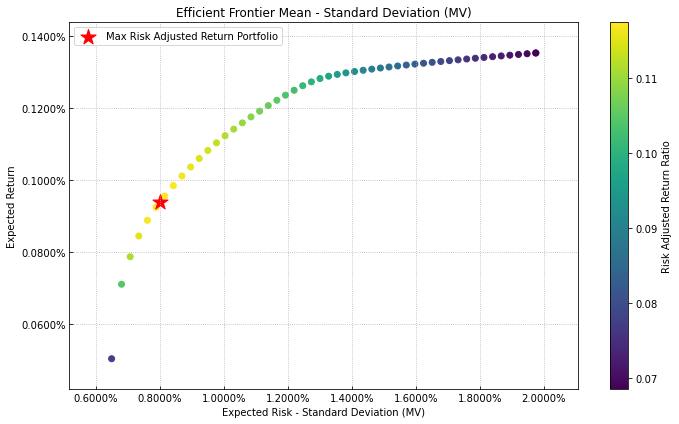

In [13]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:3.2%}".format(x) for x in ax.get_yticks()])


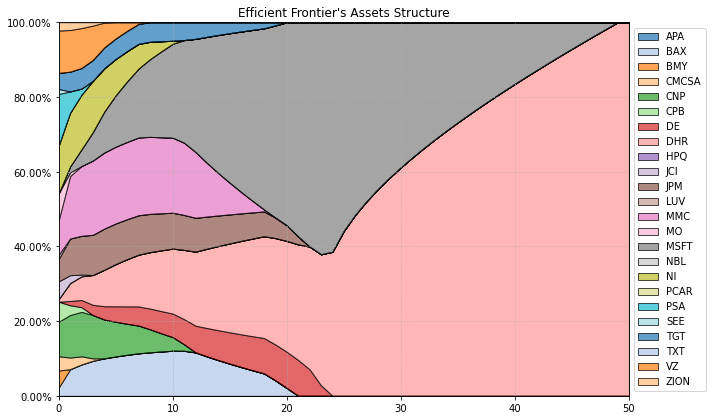

In [14]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Optimization with Constraints on Risk Factors

### 3.1 Statistics of Risk Factors

In [15]:
# Displaying factors statistics

display(loadings.min())
display(loadings.max())
display(X.corr())

const     -0.0588%
MTUM     -65.6600%
QUAL     -59.9244%
SIZE     -28.9644%
USMV    -120.9410%
VLUE     -49.1498%
dtype: float64

const     0.0689%
MTUM    103.0863%
QUAL    102.9863%
SIZE     93.8026%
USMV    232.5675%
VLUE    172.7817%
dtype: float64

,MTUM,QUAL,SIZE,USMV,VLUE
MTUM,100.0000%,90.4264%,79.1707%,87.2320%,78.5393%
QUAL,90.4264%,100.0000%,89.8148%,89.9553%,91.6579%
SIZE,79.1707%,89.8148%,100.0000%,82.5555%,87.8455%
USMV,87.2320%,89.9553%,82.5555%,100.0000%,76.9677%
VLUE,78.5393%,91.6579%,87.8455%,76.9677%,100.0000%


### 3.2 Creating Constraints on Risk Factors

In [16]:
# Creating risk factors constraints

import riskfolio.ConstraintsFunctions as cf

constraints = {'Disabled': [False, False, False, False, False],
               'Factor': ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE'],
               'Sign': ['<=', '<=', '<=', '>=', '<='],
               'Value': [-0.3, 0.8, 0.4, 0.8 , 0.9],}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Factor,Sign,Value
0,False,MTUM,<=,-30.0000%
1,False,QUAL,<=,80.0000%
2,False,SIZE,<=,40.0000%
3,False,USMV,>=,80.0000%
4,False,VLUE,<=,90.0000%


In [17]:
C, D = cf.factors_constraints(constraints, loadings)

In [18]:
port.ainequality = C
port.binequality = D

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,18.6890%,0.0000%,3.0701%,5.7736%,0.0000%,0.0000%,...,0.0000%,0.0000%,13.6257%,3.8042%,0.0000%,0.0000%,3.6800%,0.0000%,11.5215%,3.0878%


To check if the constraints are verified, I will make a regression among the portfolio returns and risk factors:

In [19]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
y = np.matrix(returns) * np.matrix(w)
results = sm.OLS(y, X1).fit()
coefs = results.params

print(coefs)

const     0.0235%
MTUM    -30.0000%
QUAL      9.5311%
SIZE     -0.2348%
USMV    100.9190%
VLUE     21.5616%
dtype: float64


### 3.3 Plotting portfolio composition

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:442: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts = ax.pie(


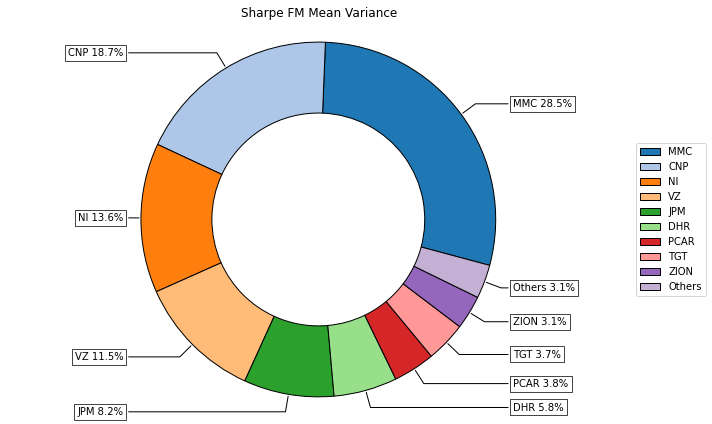

In [20]:
ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 3.4 Calculate efficient frontier

In [21]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\cvxpy\problems\problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,2.0420%,4.5376%,3.7854%,9.3487%,5.3554%,0.0000%,0.6483%,0.0000%,4.7020%,...,0.0000%,0.0000%,12.8670%,0.0000%,13.7885%,1.3531%,4.2832%,0.0000%,11.4170%,2.2751%
1,0.0000%,2.7039%,1.4330%,2.8244%,12.2804%,4.0125%,0.0000%,2.2092%,0.0000%,2.6764%,...,0.0000%,0.0000%,14.5339%,0.6175%,8.8169%,0.0000%,4.6474%,0.0000%,12.6284%,3.0512%
2,0.0000%,2.8294%,0.4820%,2.4774%,13.0713%,3.6002%,0.3210%,2.6525%,0.0000%,1.9944%,...,0.0000%,0.0000%,15.0007%,0.9187%,7.3421%,0.0000%,4.7156%,0.0000%,12.9145%,3.1167%
3,0.0000%,2.8628%,0.0000%,2.1277%,13.7795%,3.2302%,0.6316%,3.0198%,0.0000%,1.3529%,...,0.0000%,0.0000%,15.4087%,1.1779%,6.0023%,0.0000%,4.7588%,0.0000%,13.1702%,3.1590%
4,0.0000%,2.8050%,0.0000%,1.7421%,14.4701%,2.8679%,0.9072%,3.3439%,0.0000%,0.6931%,...,0.0000%,0.0000%,15.7924%,1.4222%,4.6687%,0.0000%,4.7807%,0.0000%,13.4190%,3.1875%


C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.4%}".format(x) for x in ax.get_yticks()])
C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:320: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.4%}".format(x) for x in ax.get_xticks()])


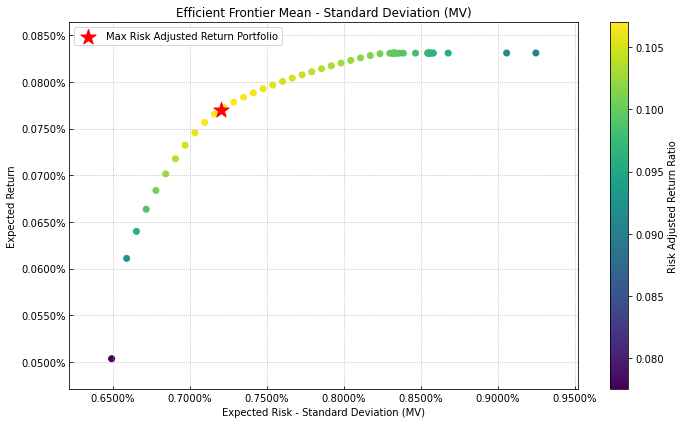

In [22]:
# Plotting efficient frontier composition

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:3.2%}".format(x) for x in ax.get_yticks()])


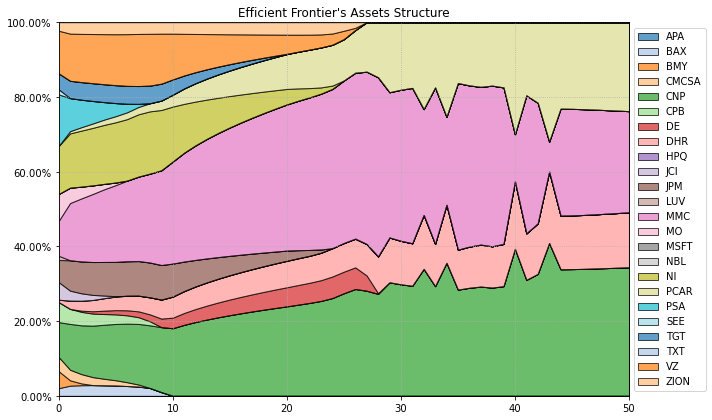

In [23]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [24]:
display(returns)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
2016-01-05,-0.6216%,0.7015%,0.1909%,0.4771%,0.9283%,0.9924%,0.1760%,0.8162%,0.2262%,0.1024%,...,0.5345%,-0.4322%,1.1712%,-0.1142%,0.8781%,0.3503%,0.1709%,-0.2179%,0.9760%,-0.3588%
2016-01-06,-2.8826%,-0.6189%,-0.9939%,-0.8928%,-0.5879%,-0.3665%,-1.6308%,-0.3020%,-2.2655%,-1.2437%,...,-0.9671%,-2.7827%,-0.0190%,-2.1627%,-0.0372%,-1.3296%,-1.3348%,-1.8858%,-0.9189%,-2.5078%
2016-01-07,-2.6623%,-1.9233%,-1.9592%,-1.9763%,-1.2059%,-0.9118%,-2.3293%,-1.8650%,-2.6825%,-1.8346%,...,-2.9275%,-2.9328%,-0.8785%,-2.6700%,-1.0104%,-1.9327%,-1.5868%,-2.5818%,-1.1148%,-2.2576%
2016-01-08,-1.6392%,-1.0494%,-0.9502%,-1.0563%,-1.0629%,-0.9912%,-1.2714%,-0.9815%,-1.3391%,-1.0316%,...,-1.1005%,-1.2201%,-0.9977%,-1.3251%,-0.9137%,-1.2707%,-0.7749%,-1.3179%,-0.9447%,-1.1159%
2016-01-11,-2.1947%,0.3346%,0.0940%,0.1556%,-0.0892%,-0.0992%,-0.6710%,0.6154%,-0.7521%,-0.5531%,...,0.8840%,-0.9994%,0.2115%,-0.7606%,0.3162%,-0.5902%,-0.4203%,-0.8322%,-0.1965%,-1.4506%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.9714%,0.7567%,0.4352%,0.6099%,0.6594%,0.6208%,0.9431%,0.7662%,1.0756%,0.7009%,...,0.8453%,0.8012%,0.5968%,0.7452%,0.4033%,0.7251%,0.6842%,0.7578%,0.7437%,0.9387%
2019-12-23,0.6977%,-0.4230%,-0.0181%,-0.1988%,-0.5600%,-0.7395%,0.1195%,-0.4878%,0.1331%,0.0623%,...,-0.2397%,0.6079%,-0.8528%,0.4848%,-0.6862%,-0.1714%,0.1147%,0.3195%,-0.5775%,0.6393%
2019-12-24,-0.1975%,0.1506%,-0.0503%,0.0391%,0.0930%,0.1012%,0.0556%,0.2259%,-0.0062%,0.0213%,...,0.1480%,-0.2085%,0.1566%,-0.1183%,0.0728%,-0.0242%,0.0305%,-0.0877%,0.0779%,-0.0758%
2019-12-26,0.0838%,0.3568%,0.2717%,0.3344%,0.2787%,0.1975%,0.3099%,0.4044%,0.3698%,0.2075%,...,0.5190%,0.2736%,0.2525%,0.3526%,0.2093%,0.2125%,0.2577%,0.2180%,0.2815%,0.2243%


## 4. Estimating Portfolios Using Risk Factors with Other Risk Measures

In this part I will calculate optimal portfolios for several risk measures. I will find the portfolios that maximize the risk adjusted return for all available risk measures.

### 4.1 Calculate Optimal Portfolios for Several Risk Measures.

I will mantain the constraints on risk factors.

In [25]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\cvxpy\problems\problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [26]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,18.69%,52.04%,57.69%,45.45%,63.60%,65.58%,35.57%,31.07%,38.90%,71.74%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.07%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,5.77%,11.64%,9.13%,9.20%,11.60%,13.90%,0.55%,20.52%,3.24%,23.64%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

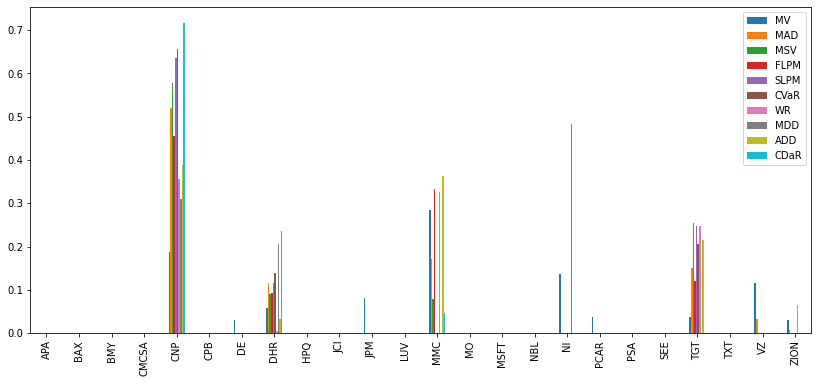

In [27]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [28]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = True

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [29]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.95%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,19.75%,17.87%,19.53%,16.41%,21.15%,39.65%,26.52%,54.20%,15.51%,43.02%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,8.59%,0.00%,0.00%,0.00%
DE,3.30%,1.65%,5.21%,1.53%,0.00%,0.00%,0.00%,0.00%,3.25%,0.07%
DHR,5.78%,5.93%,4.68%,6.24%,10.29%,8.96%,3.19%,16.05%,2.56%,14.59%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

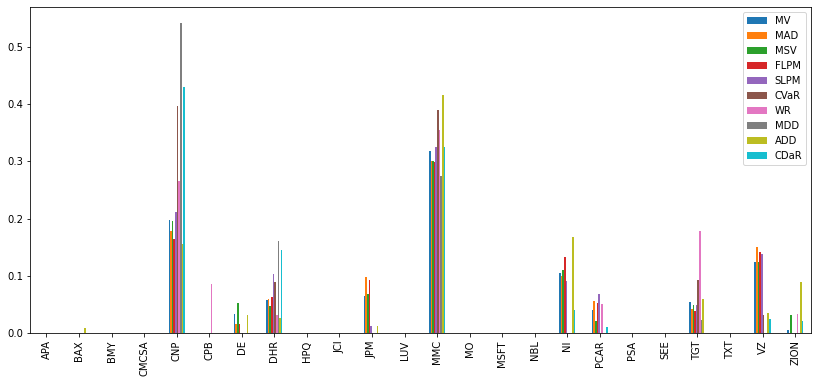

In [30]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)